<a href="https://colab.research.google.com/github/LHMasson/rna_tcc/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
import pickle

In [3]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('dark_background')

# Dataset

In [22]:
x, y = datasets.make_moons(n_samples=500, noise=0.05)

In [23]:
print(f'{x.shape =}, {y.shape =}')

x.shape =(500, 2), y.shape =(500,)


In [24]:
pd.DataFrame({'x_1': x[:, 0], 'x_2': x[:, 1], 'y': y})

,x_1,x_2,y
0,0.828175,-0.456417,1
1,0.161918,0.065525,1
2,-0.375703,0.932828,0
3,0.900307,0.406136,0
4,1.795077,0.134189,1
...,...,...,...
495,2.020096,0.479134,1
496,1.382681,-0.445119,1
497,-0.970176,0.061778,0
498,0.154576,0.984403,0


In [25]:
unique = np.unique(y, return_counts = True)
for label, qt_label in zip(unique[0], unique[1]):
    print(f'Label: {label}\t Counts: {qt_label}')

Label: 0	 Counts: 250
Label: 1	 Counts: 250


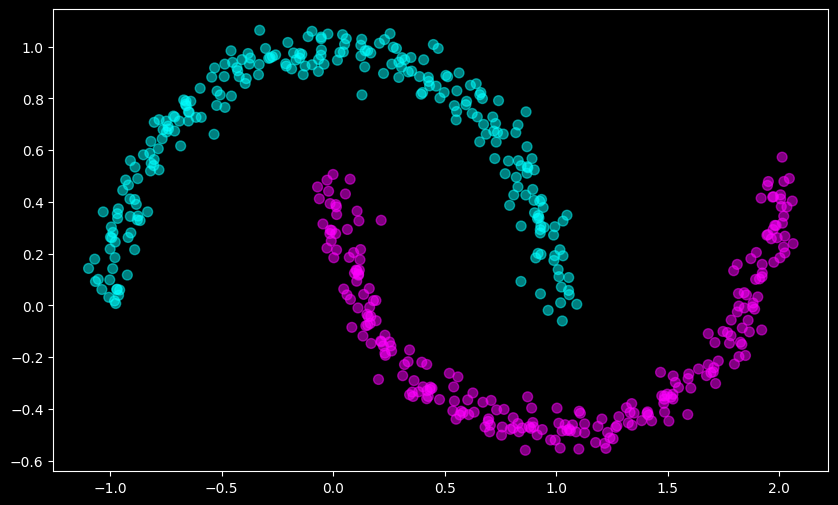

In [26]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, alpha=0.5, cmap='cool')
plt.show()

# Modelo



*   Inicialização dos pesos e bias
*   Feedforward
*   Calculo de perda
*   Backpropagation
*   Fit



In [40]:
class NnModel:
  def __init__(self, x: np.ndarray, y: np.ndarray, hidden_neurons: int = 10, output_neurons: int = 2):
     np.random.seed(8)
     self.x = x
     self.y = y
     self.hidden_neurons = hidden_neurons
     self.output_neurons = output_neurons
     self.input_neurons = self.x.shape[1]

     # Inicializa os pessos e bias
     # Xavier Initialization -> variancia dos pesos iguais em todas as camadas
     self.W1 = np.random.randn(self.input_neurons, self.hidden_neurons) / np.sqrt(self.input_neurons)
     self.B1 = np.zeros((1, self.hidden_neurons))
     self.W2 = np.random.randn(self.hidden_neurons, self.output_neurons) / np.sqrt(self.hidden_neurons)
     self.B2 = np.zeros((1, self.output_neurons))
     self.mode_dict = {'W1': self.W1, 'B1': self.B1, 'W2': self.W2, 'B2': self.B2}
     self.z1 = 0
     self.f1 = 0

  def forward(self, x: np.ndarray) -> np.ndarray:
    # Equação da reta (1)
    self.z1 = x.dot(self.W1) + self.B1

    # Função de ativação (1)
    self.f1 = np.tanh(self.z1)

    # Equação da reta (2)
    z2 = self.f1.dot(self.W2) + self.B2

    # Função de ativação (2)
    f2 = np.tanh(z2)

    # Softmax
    exp_values = np.exp(f2)
    softmax = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    return softmax

  def loss(self, softmax):
    # Cross Entropy
    predicitions = np.zeros(self.y.shape[0])
    for i, correct_index in enumerate(self.y):
      predicted = softmax[i][correct_index]
      predicitions[i] = predicted

    log_prob = -np.log(predicted)
    return log_prob/self.y.shape[0]

  def backpropagation(self):
    pass

  def fit(self):
    pass

In [43]:
modelo = NnModel(x, y, 10, 2)
softmax = modelo.forward(x)
modelo.loss(softmax)

0.0012596994176256582